<h2><b>Model Comparison Image Generation</h2>
<h4><b>Generating Validation Loader</b></h4>

In [10]:
import torch
import torchvision
from torchvision import datasets, transforms

test_dir = '.\\dataset\\validation_dataset'

test_transforms = transforms.Compose(   [   transforms.Resize((224,224)),
                                            transforms.ToTensor(),
                                            torchvision.transforms.Normalize(
                                            mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225],
                                            ),
                                        ]   )

RE_test_transforms = transforms.Compose(   [   transforms.Resize((224,224)),
                                            transforms.ToTensor(),
                                            torchvision.transforms.Normalize(
                                            mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225],
                                            ),
                                            transforms.RandomErasing()
                                        ]   )

test_data = datasets.ImageFolder(test_dir,transform=test_transforms)
RE_test_data = datasets.ImageFolder(test_dir,transform=RE_test_transforms)


testloader = torch.utils.data.DataLoader(test_data, shuffle = True, batch_size=1)
RE_testloader = torch.utils.data.DataLoader(RE_test_data, shuffle = True, batch_size=1)

<h4><b>Normal Model Prediction

In [11]:
resnet50_model = torch.load('./model.pt')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)
print(labels.float().item())

output = resnet50_model(images)

threshold = 0.5
predictions = (output > threshold).float()

print(predictions.item())



1.0
1.0


In [12]:
resnet50_model = torch.load('./model_40.pt')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network
        outputs = resnet50_model(images)
        predictions = (output > threshold).float().item()
        total += 1
        if predictions == labels.float().item():
            correct += 1

print(correct, total)
print(f'Accuracy of the network on the test images: {100 * correct / total} %')

1212 1800
Accuracy of the network on the test images: 67.33333333333333 %


<h4><b>Random Erasing Model Prediction

In [13]:
RE_resnet50_model = torch.load('./RE_model.pt')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

RE_correct = 0
RE_total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in RE_testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network
        outputs = RE_resnet50_model(images)
        predictions = (output > threshold).float().item()
        RE_total += 1
        if predictions == labels.float().item():
            RE_correct += 1

print(correct, total)
print(f'Accuracy of the network on the test images: {100 * RE_correct / RE_total} %')

1212 1800
Accuracy of the network on the test images: 67.33333333333333 %


<h4><b>Making a Comparison Graph

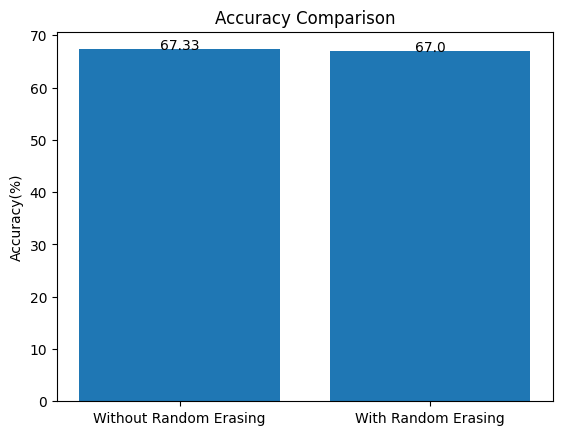

In [14]:
import matplotlib.pyplot as plt
import numpy as np

left = np.array(["Without Random Erasing", "With Random Erasing"])
height = np.array([round(100 * correct / total, 2), round(100 * RE_correct / RE_total,2)])

# show the number on the bar
for a, b, i in zip(left, height, range(len(left))):
    plt.text(a, b, height[i], ha='center', fontsize=10)

plt.bar(left, height)

plt.title("Accuracy Comparison")
plt.ylabel("Accuracy(%)")

plt.savefig("model_comparison.png")